In [18]:
import pandas as pd

#读入数据
df = pd.read_csv('quanbu_lr-17-yuanshi.csv')
df

,tw_topic,tw_wordnum,tw_senword_num,tw_flu,fbz_fan_num,fbz_tweet_num,fbz_label_num,fbz_bei_zhfa_pj_num,fbz_bei_pingl_pj_num,fbz_bei_zan_pj_num,zfz_fan_num,zfz_guanzh_num,zfz_zf_lv,zfz_active,zfz_guanzhu_interest,afz_retweet_interest,re_result
0,1,24,5,0,5549425,3848,0,32,141,863,13112,189,0.08163,0.49,0.00000,0.01818,0
1,1,19,2,0,2333481,1103,6,1681,752,1977,13112,189,0.08163,0.49,0.00000,0.00000,0
2,1,27,1,0,2333481,1103,6,1681,752,1977,13112,189,0.08163,0.49,0.00000,0.00889,0
3,1,4,1,0,26867988,860,0,250331,31483,149796,13112,189,0.08163,0.49,0.00000,0.00000,0
4,2,20,5,0,26867988,860,0,250331,31483,149796,13112,189,0.08163,0.49,0.00000,0.00917,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194390,1,41,4,2,17545394,45300,0,14749,8500,20153,6091480,339,0.89583,0.54,0.09302,0.02075,1
194391,1,51,3,2,17545394,45300,0,14749,8500,20153,6091480,339,0.89583,0.54,0.09302,0.01619,1
194392,1,82,11,1,629886,39790,0,6195,547,3350,629886,1120,0.35849,0.73,0.57895,0.04059,1
194393,0,61,5,1,629886,39790,0,6195,547,3350,629886,1120,0.35849,0.73,0.57895,0.03162,1


In [19]:
#查看缺失数据
df.isnull().sum()

tw_topic                0
tw_wordnum              0
tw_senword_num          0
tw_flu                  0
fbz_fan_num             0
fbz_tweet_num           0
fbz_label_num           0
fbz_bei_zhfa_pj_num     0
fbz_bei_pingl_pj_num    0
fbz_bei_zan_pj_num      0
zfz_fan_num             0
zfz_guanzh_num          0
zfz_zf_lv               0
zfz_active              0
zfz_guanzhu_interest    0
afz_retweet_interest    0
re_result               0
dtype: int64

In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194395 entries, 0 to 194394
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   tw_topic              194395 non-null  int64  
 1   tw_wordnum            194395 non-null  int64  
 2   tw_senword_num        194395 non-null  int64  
 3   tw_flu                194395 non-null  int64  
 4   fbz_fan_num           194395 non-null  int64  
 5   fbz_tweet_num         194395 non-null  int64  
 6   fbz_label_num         194395 non-null  int64  
 7   fbz_bei_zhfa_pj_num   194395 non-null  int64  
 8   fbz_bei_pingl_pj_num  194395 non-null  int64  
 9   fbz_bei_zan_pj_num    194395 non-null  int64  
 10  zfz_fan_num           194395 non-null  int64  
 11  zfz_guanzh_num        194395 non-null  int64  
 12  zfz_zf_lv             194395 non-null  float64
 13  zfz_active            194395 non-null  float64
 14  zfz_guanzhu_interest  194395 non-null  float64
 15  

归一化

In [21]:
from sklearn.preprocessing import MinMaxScaler

data_set = df.copy()
scaler = {}  # 创建一个字典，存储每一列不同归一化参数的函数
for i in range(len(data_set.columns)-1):
    scaler[i] = MinMaxScaler(feature_range=(-1, 1))
    data_set.iloc[:, i] = scaler[i].fit_transform(data_set.iloc[:, i].values.reshape(-1, 1))

切割数据集

In [22]:
from sklearn.model_selection import train_test_split

all_inputs = data_set.iloc[:,:-1].values
all_re_result = data_set['re_result'].values

x_train, x_test, y_train, y_test = train_test_split(all_inputs, all_re_result, train_size=0.8, random_state=1)

使用决策树算法进行分析

In [23]:
from sklearn.tree import DecisionTreeClassifier

#定义一个决策树的对象
decision_tree_classifier = DecisionTreeClassifier()

#训练模型
decision_tree_classifier.fit(x_train, y_train)

#所得模型的准确性
decision_tree_classifier.score(x_test, y_test)

0.9995370251292471

交叉验证

[0.97633745 0.99876543 0.99794239 0.99927984 0.99501029 0.99948557
 0.99845671 0.99665621 0.99933124 0.99639899]


Text(0.5, 1.0, 'Average score: 0.9957664111559703')

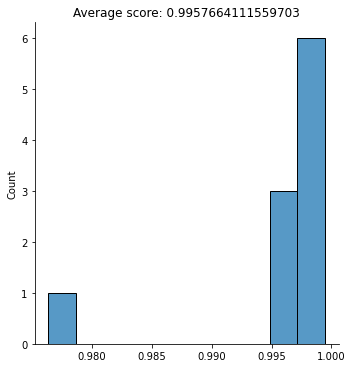

In [24]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

decision_tree_classifier = DecisionTreeClassifier()

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_re_result, cv=10)#cv：选择每次测试折数 
print (cv_scores)

sb.displot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

[0.97932099 0.98564815 0.98600823 0.99089506 0.98338477 0.9813262
 0.98472144 0.98420701 0.98667627 0.98708781]


Text(0.5, 1.0, 'Average score: 0.9849275926889158')

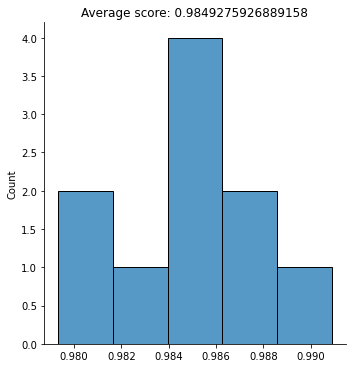

In [25]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_re_result, cv=10)
print (cv_scores)
sb.displot(cv_scores, kde=False)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

使用GridSearchCV网格搜索进行自动调参，把参数输进去，能给出最优化的结果和参数

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation  = StratifiedKFold(n_splits = 10, shuffle=True)  
cross_validation.get_n_splits(all_re_result)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_re_result)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.9899070321700657
Best parameters: {'max_depth': 5, 'max_features': 4}
